In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import defaultdict


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap
#import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [2]:
pd.options.display.max_columns = 100

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df = pd.read_pickle("data/combined_df")

df["RURAL_TYPE"] = df["RURAL_TYPE"].astype('category')

df["RURAL_TYPE"]

GCD    YEAR
10401  2011    430
10402  2011    430
10403  2011    430
10404  2011    430
10405  2011    430
              ... 
62148  2019    330
70317  2019    330
70336  2019    330
70349  2019    330
70813  2019    330
Name: RURAL_TYPE, Length: 2338, dtype: category
Categories (2, int64): [330, 430]

In [4]:
df.describe()

p_foreign      foreign     p_employ       employ  p_employ_1564  \
count  2338.000000  2338.000000  2338.000000  2338.000000    2338.000000   
mean      6.091022    96.982891    51.629457   749.455518      77.226476   
std       5.711222   169.788871     3.926449   570.281076       4.054530   
min       0.120000     1.000000    34.720000    19.000000      53.190000   
25%       2.640000    24.000000    49.062500   371.000000      74.532500   
50%       4.550000    49.000000    51.610000   594.000000      77.605000   
75%       7.970000    97.750000    54.240000   939.750000      80.087500   
max      64.630000  2396.000000    66.670000  3678.000000      88.370000   

         employ_1564  p_employ_sec_I  employ_sec_I  p_employ_sec_II  \
count    2338.000000     2338.000000   2338.000000      2338.000000   
mean     1875.150984       20.555787     61.108640        22.341005   
std      7394.757604       14.327958     54.626449        15.023136   
min        19.000000        0.000000      0.000000         0.000000   
25%       427.000000        9.060000     21.000000        11.262500   
50%       740.000000       18.180000     47.000000        19.590000   
75%      1222.750000       29.900000     85.000000        29.500000   
max    153188.000000      100.000000    330.000000        89.750000   

       employ_sec_II  p_employ_sec_III  employ_sec_III    p_pension  \
count    2338.000000       2338.000000     2338.000000  2338.000000   
mean      120.912746         57.103067      283.514115    24.118777   
std       191.550957         17.181191      409.237150     5.141434   
min         0.000000          0.000000        0.000000    12.070000   
25%        18.000000         45.402500       69.000000    20.202500   
50%        52.000000         56.245000      144.000000    23.855000   
75%       140.000000         69.655000      300.750000    27.887500   
max      2242.000000        100.000000     3172.000000    42.730000   

           pension  p_employ_female  employ_female  p_employ_male  \
count  2338.000000      2338.000000    2338.000000    2338.000000   
mean    349.318221        67.109367     310.974337      78.143358   
std     276.418933         7.236289     245.089133       5.436210   
min       8.000000        36.700000       9.000000      50.000000   
25%     172.000000        63.250000     148.250000      74.687500   
50%     277.500000        67.910000     244.000000      78.535000   
75%     433.750000        72.027500     395.000000      82.147500   
max    1976.000000        83.030000    1624.000000      93.750000   

       employ_male       p_comm       comm_o       comm_i      fam_avc  \
count  2338.000000  2338.000000  2338.000000  2338.000000  2338.000000   
mean    380.221557    58.782032   435.876818   208.133020     1.663914   
std     283.198249    36.531587   284.843644   326.025404     0.140583   
min       7.000000     3.850000    10.000000     0.000000     1.320000   
25%     190.250000    35.520000   229.000000    39.000000     1.560000   
50%     302.000000    48.075000   380.000000    92.000000     1.650000   
75%     483.750000    71.257500   578.750000   232.000000     1.750000   
max    1732.000000   255.360000  1878.000000  3238.000000     2.470000   

                pop     p_pop_15     p_pop_65  p_edu_level_2  p_edu_level_3  \
count   2338.000000  2338.000000  2338.000000    2338.000000    2338.000000   
mean    1485.201454    13.760864    20.856587      63.524636       6.313003   
std     1197.354048     2.496022     4.181533       4.797015       2.333513   
min       42.000000     5.400000     9.600000      44.200000       0.000000   
25%      734.250000    12.000000    17.900000      60.500000       4.700000   
50%     1151.500000    13.800000    20.700000      63.900000       6.100000   
75%     1817.750000    15.400000    23.600000      66.900000       7.600000   
max    12900.000000    24.200000    39.300000      76.600000      17.400000   

        p_comm_out           hh        hh_a

In [5]:
df["type_balance"] = df["comm_i"] - df["comm_o"]
df["commute_balance"].describe()


count    2338.000000
mean     -227.743798
std       303.995335
min     -1195.000000
25%      -372.000000
50%      -229.000000
75%      -118.000000
max      2249.000000
Name: commute_balance, dtype: float64

In [6]:
df["attract_commute"] = df["commute_balance"] > 0
df["attract_commute"].value_counts()



False    2094
True      244
Name: attract_commute, dtype: int64

In [7]:
list(df.columns)

['NAME',
 'RURAL_TYPE',
 'p_foreign',
 'foreign',
 'p_for_EU',
 'for_EU',
 'p_employ',
 'employ',
 'p_employ_1564',
 'employ_1564',
 'p_employ_sec_I',
 'employ_sec_I',
 'p_employ_sec_II',
 'employ_sec_II',
 'p_employ_sec_III',
 'employ_sec_III',
 'p_pension',
 'pension',
 'p_employ_female',
 'employ_female',
 'p_employ_male',
 'employ_male',
 'p_comm',
 'comm_o',
 'comm_i',
 'fam_avc',
 'pop',
 'p_pop_15',
 'p_pop_65',
 'p_edu_level_2',
 'p_edu_level_3',
 'p_comm_out',
 'hh',
 'hh_av',
 'families',
 'comp',
 'firm',
 'employ_pow',
 'commute_balance',
 'attract_commute']

In [21]:
y_commute = df["attract_commute"].values.astype("int")
np.bincount(y_commute)

array([2094,  244])

In [75]:
y_type = df["RURAL_TYPE"].values.astype("int")
np.unique(y_type, return_counts=True)


(array([330, 430]), array([ 226, 2112]))

In [24]:
selected_columns_commute = ['RURAL_TYPE', 'p_foreign', 'foreign', 'p_for_EU', 'for_EU',
                     'p_employ', 'employ', 'p_employ_1564', 'employ_1564', 'p_employ_sec_I',
                     'employ_sec_I', 'p_employ_sec_II', 'employ_sec_II', 'p_employ_sec_III',
                     'employ_sec_III', 'p_pension', 'pension', 'p_employ_female',
                     'employ_female', 'p_employ_male', 'employ_male',
                     'fam_avc', 'pop', 'p_pop_15', 'p_pop_65', 'p_edu_level_2',
                     'p_edu_level_3', 'hh', 'hh_av', 'families', 'comp',
                     'firm', 'employ_pow']

In [27]:
X_commute = df[selected_columns_commute].values

X_commute[np.where(X_commute == "-")] = 0.0
X_commute = X_commute.astype("double")

X_commute = normalize(X_commute, norm="max", axis=0)

In [28]:
X_type = df[selected_columns_type].values

X_type[np.where(X_type == "-")] = 0.0
X_type = X_type.astype("double")

X_type = normalize(X_type, norm="max", axis=0)

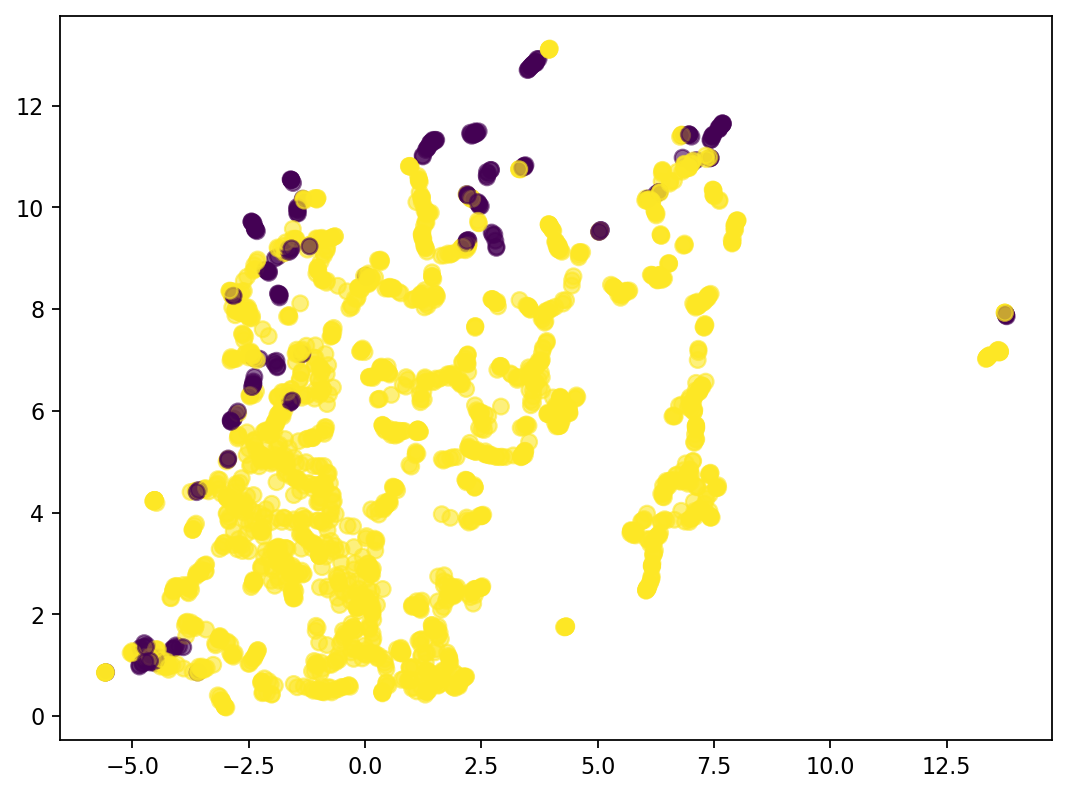

In [69]:
plt.figure(figsize=(8, 6), dpi=160)

standard_embedding_commute = umap.UMAP(random_state=42).fit_transform(X_commute)
plt.scatter(standard_embedding_commute[:, 0], standard_embedding_commute[:, 1], c=y_commute, s=50.0, alpha=0.6, cmap='viridis_r');
plt.savefig("standard_embedding_commute.png")

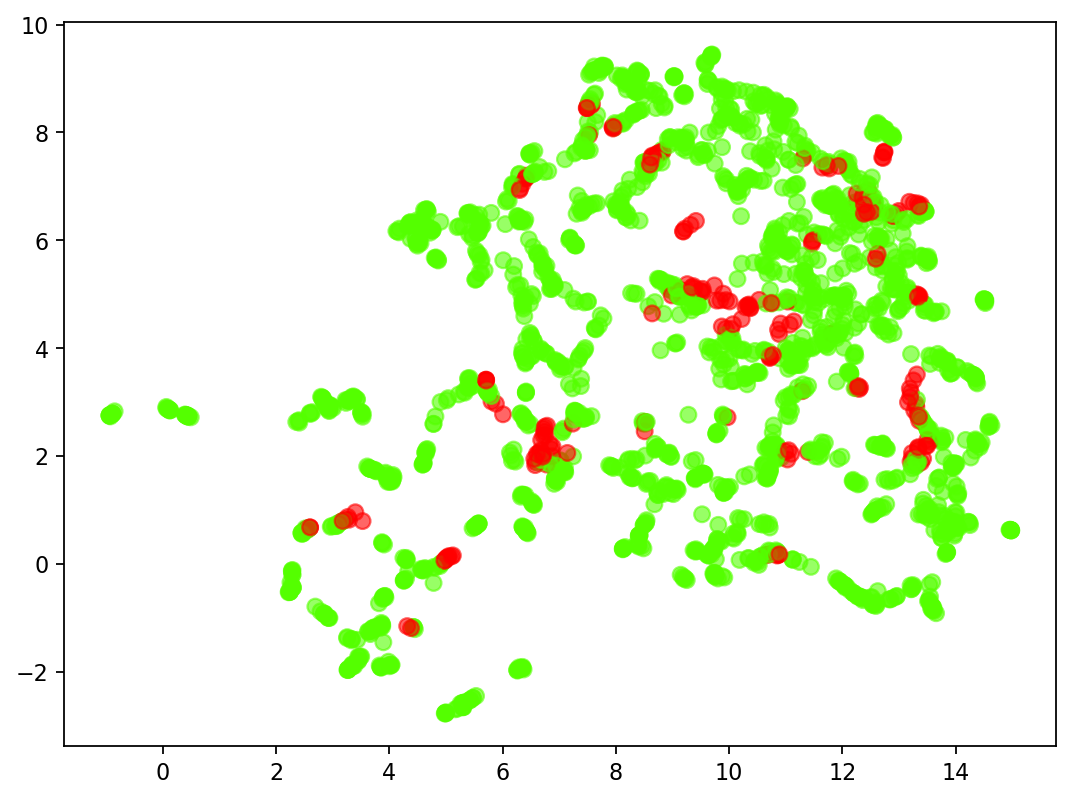

In [68]:
plt.figure(figsize=(8, 6), dpi=160)

standard_embedding_type = umap.UMAP(random_state=42).fit_transform(X_type)
plt.scatter(standard_embedding_type[:, 0], standard_embedding_type[:, 1], c=y_type, s=50.0, alpha=0.6, cmap='prism');
plt.savefig("standard_embedding_type.png")

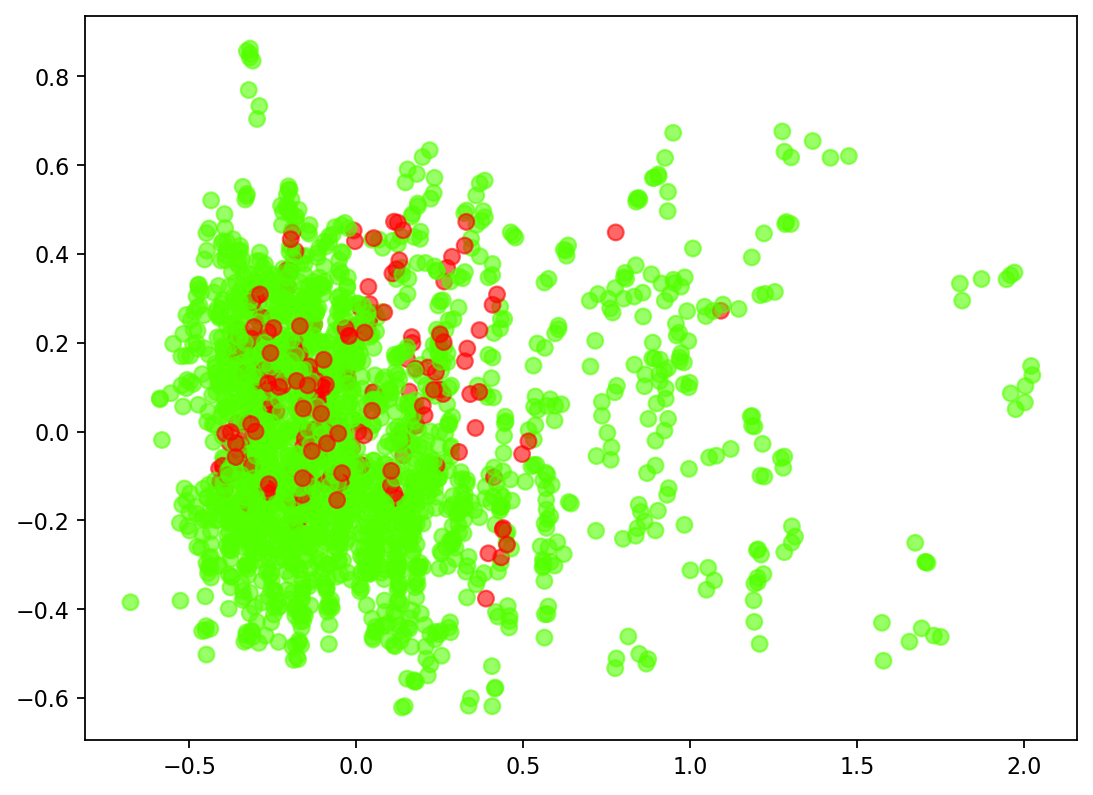

In [67]:
plt.figure(figsize=(8, 6), dpi=160)

pca_embedding_type = PCA(n_components=2).fit_transform(X_type)
plt.scatter(pca_embedding_type[:, 0], pca_embedding_type[:, 1], c=y_type, s=50.0, alpha=0.6, cmap='prism');
plt.savefig("pca_embedding_type.png")

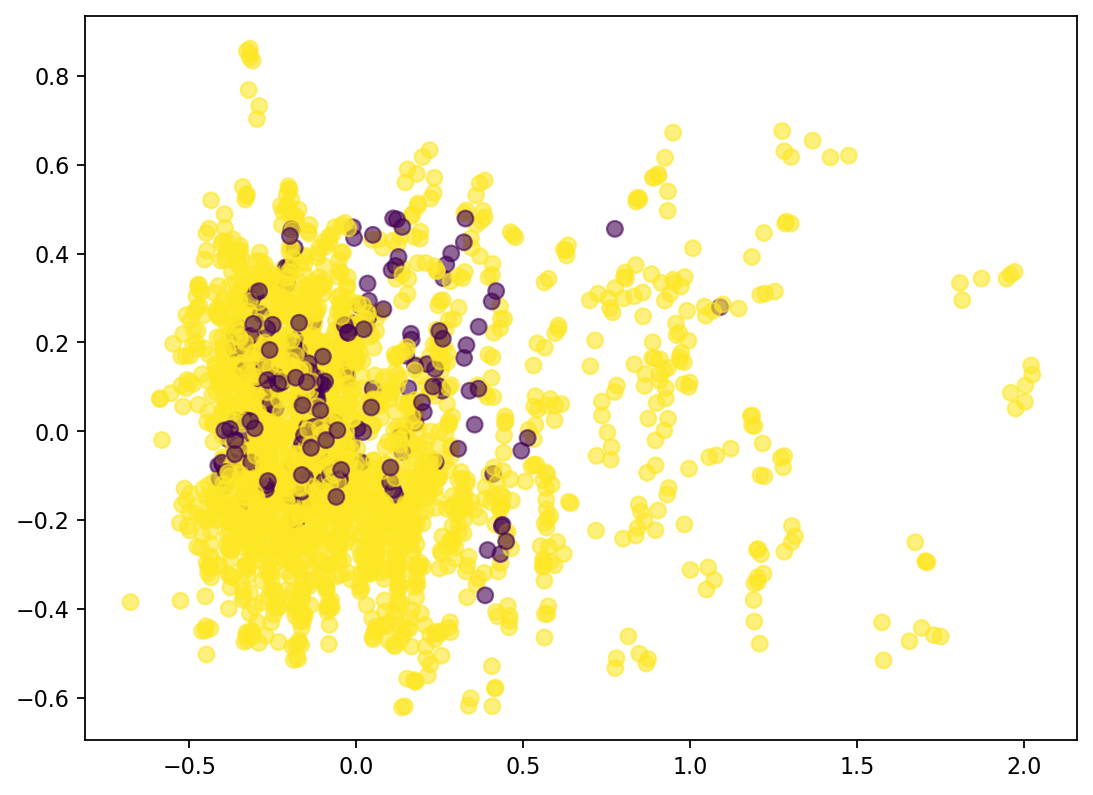

In [66]:
plt.figure(figsize=(8, 6), dpi=160)

pca_embedding_commute = PCA(n_components=2).fit_transform(X_commute)
plt.scatter(pca_embedding_commute[:, 0], pca_embedding_commute[:, 1], c=y_type, s=50.0, alpha=0.6, cmap='viridis');
plt.savefig("pca_embedding_commute.png")

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


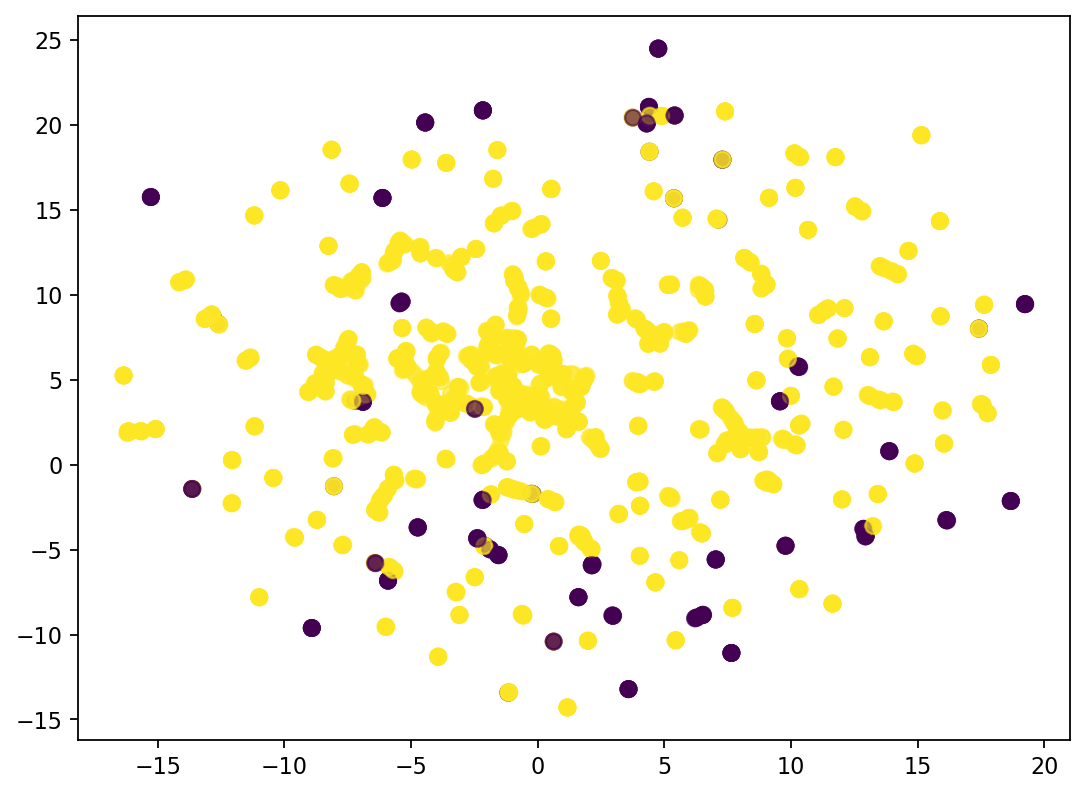

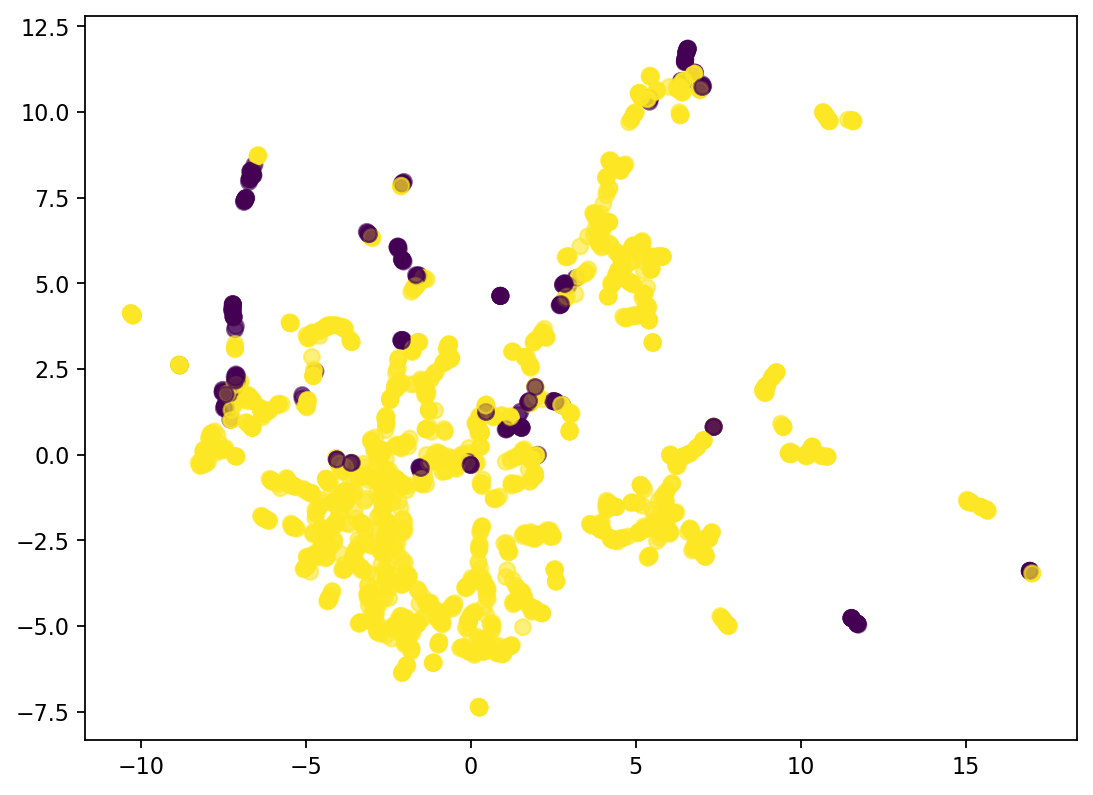

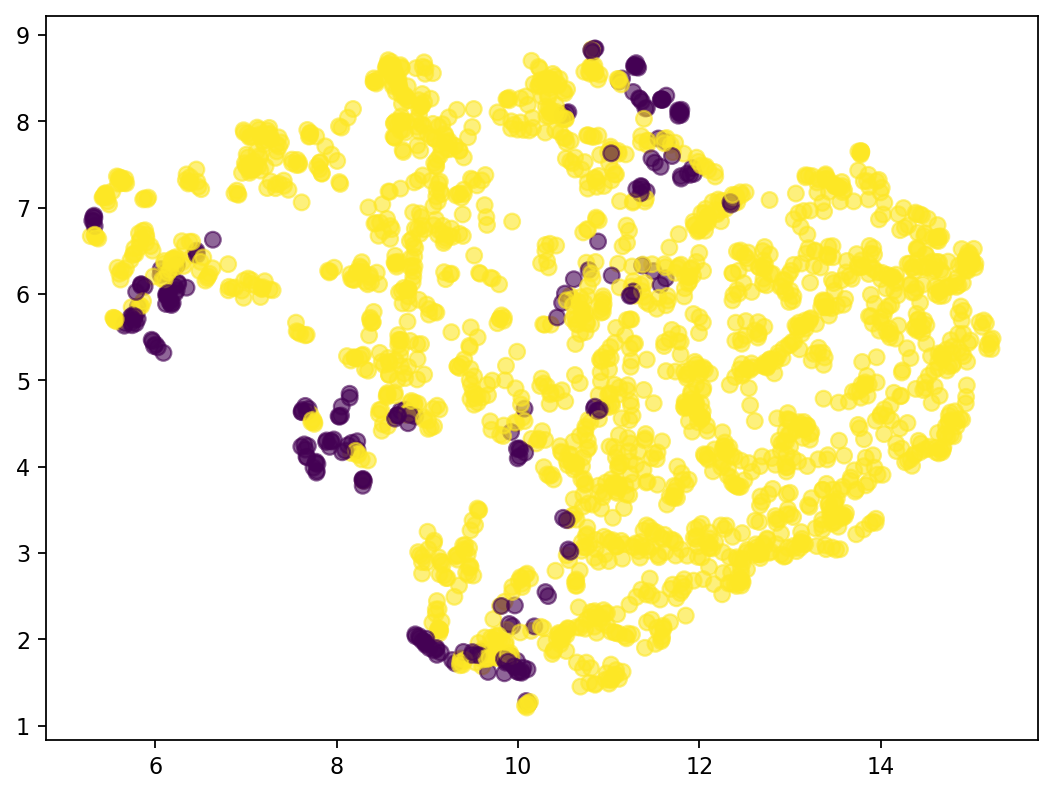

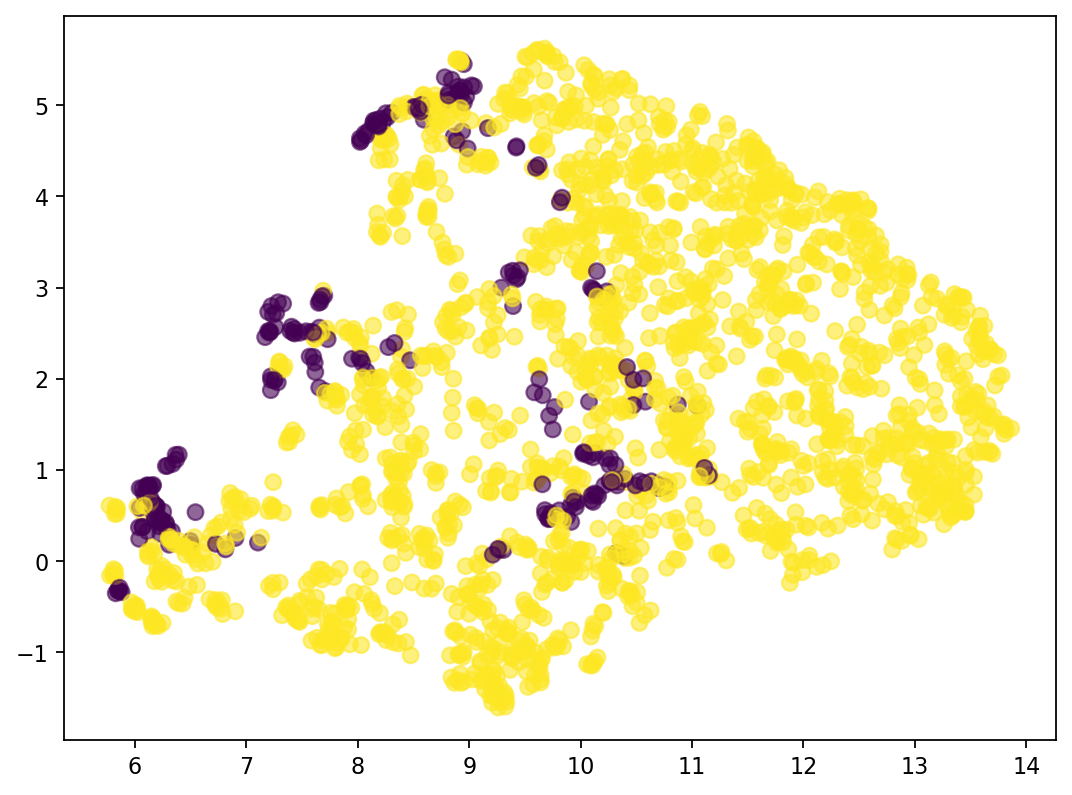

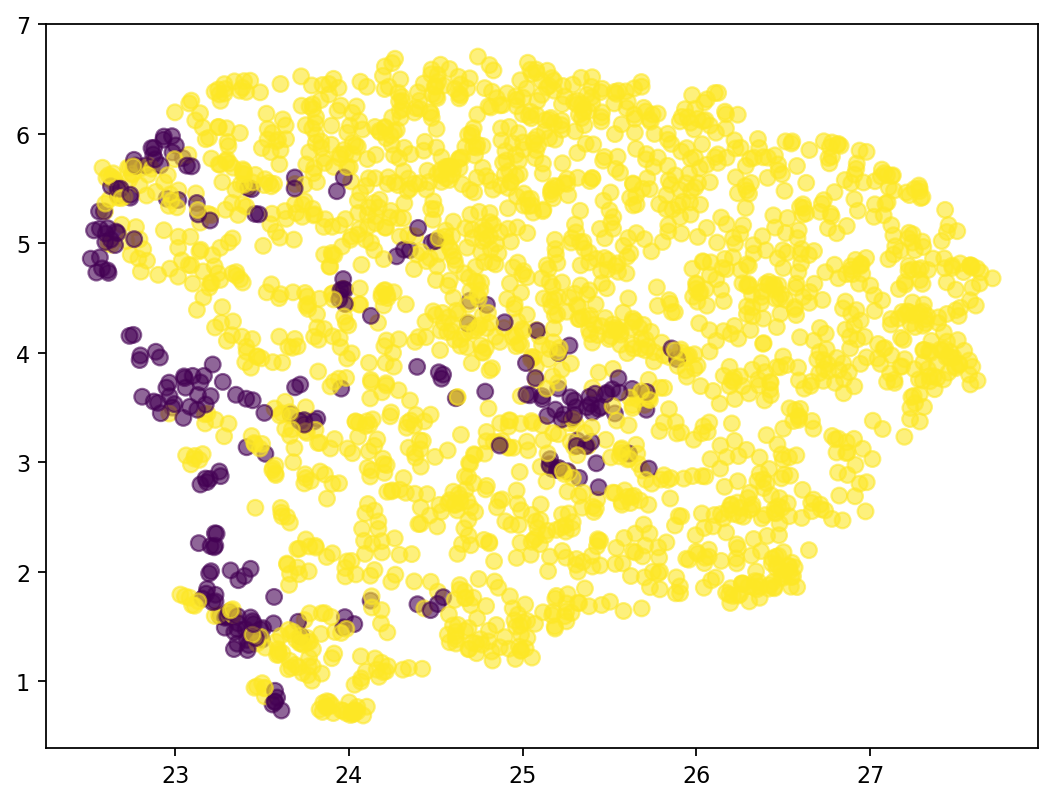

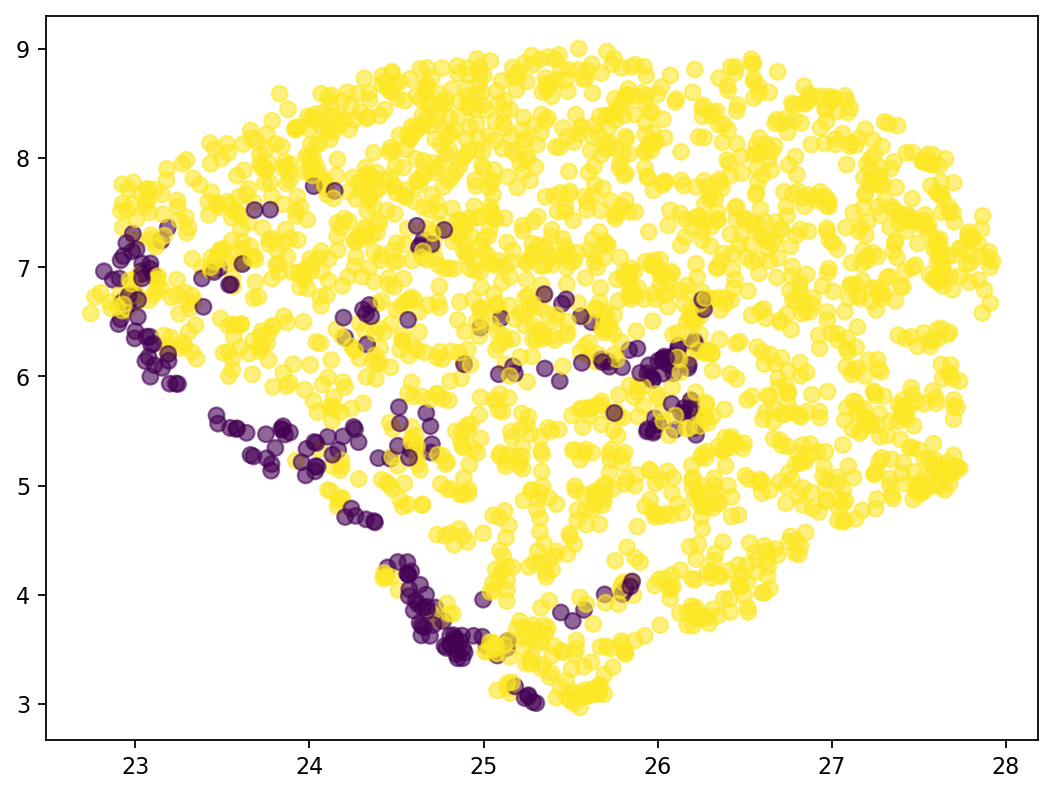

In [62]:

for n in [5, 10, 50, 100, 1000, 10000]:

    plt.figure(figsize=(8, 6), dpi=160)

    standard_embedding_commute = umap.UMAP(random_state=42, n_neighbors=n).fit_transform(X_commute)
    plt.scatter(standard_embedding_commute[:, 0], standard_embedding_commute[:, 1], c=y_commute, s=50.0, alpha=0.6, cmap='viridis_r');
    plt.savefig(f"umap_neighbors_commute_{n}.png")

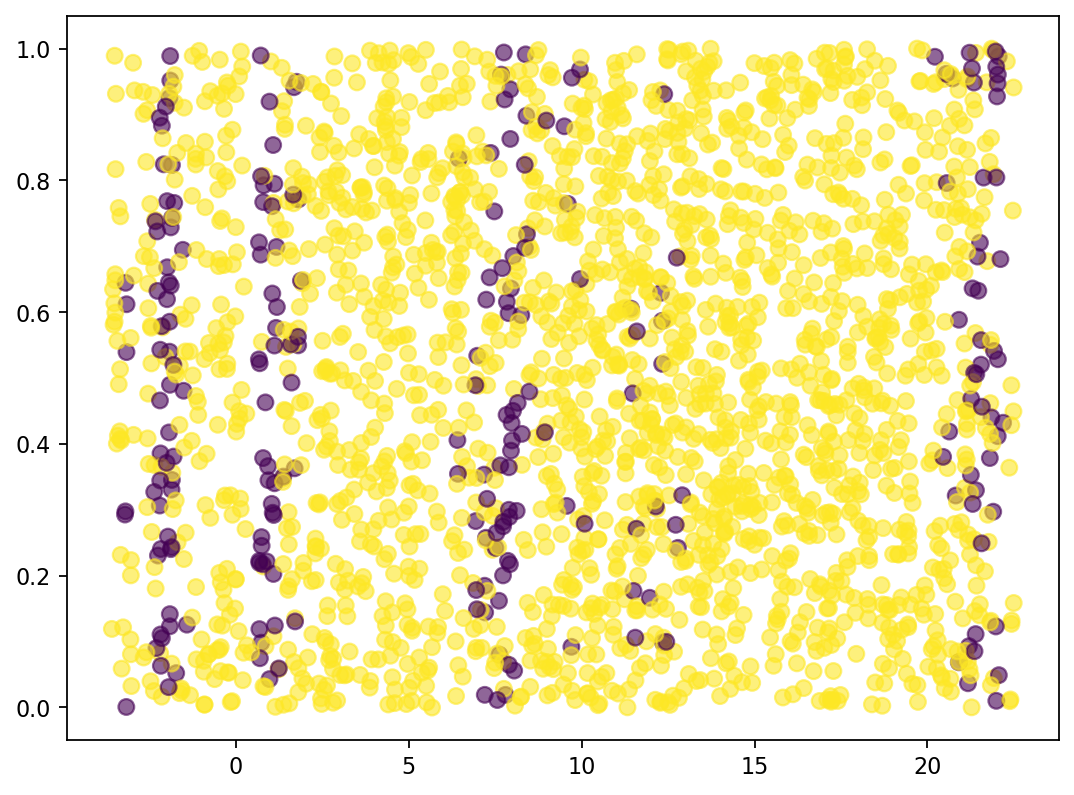

In [61]:
plt.figure(figsize=(8, 6), dpi=160)

n_1_commute = umap.UMAP(random_state=42, n_neighbors=50, n_components=1).fit_transform(X_commute)
plt.scatter(n_1_commute[:, 0], np.random.rand(n_1_commute[:, 0].shape[0]), c=y_commute, s=50.0, alpha=0.6, cmap='viridis_r');
plt.savefig(f"umap_components_1_commute.png")